# 📘 Enhanced EDA Notebook for Spam Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import re
%matplotlib inline

In [3]:
df = pd.read_csv("/workspaces/spam_detection/data/maildata.csv", encoding='latin-1')
print("✅ Dataset Loaded Successfully!")
print(f"Shape of dataset: {df.shape}")
df.head()

✅ Dataset Loaded Successfully!
Shape of dataset: (5572, 2)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print("\n📊 Dataset Info:")
print(df.info())
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())
print("\n📈 Unique values per column:")
print(df.nunique())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

🔍 Checking for missing values:
Category    0
Message     0
dtype: int64

📈 Unique values per column:
Category       2
Message     5157
dtype: int64


In [5]:
df = df.rename(columns=lambda x: x.strip().lower())
df = df.loc[:, ~df.columns.str.contains('^unnamed')]
if 'label' in df.columns:
    label_col = 'label'
elif 'Category' in df.columns:
    df.rename(columns={'Category': 'label'}, inplace=True)
    label_col = 'label'
else:
    label_col = df.columns[0]
print("📌 Label column identified as:", label_col)

📌 Label column identified as: category


/tmp/ipykernel_1459/4016744548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label_col, palette="coolwarm")


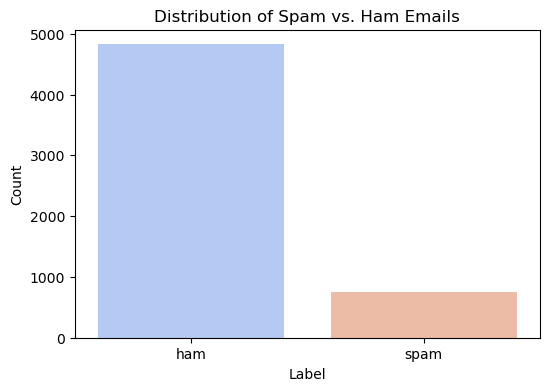


📊 Percentage Distribution:
 category
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=label_col, palette="coolwarm")
plt.title("Distribution of Spam vs. Ham Emails")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
label_counts = df[label_col].value_counts(normalize=True) * 100
print("\n📊 Percentage Distribution:\n", label_counts)

In [7]:
text_col = [col for col in df.columns if col != label_col][0]
df['text_length'] = df[text_col].astype(str).apply(len)
df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))
df[['text_length', 'word_count']].describe()

,text_length,word_count
count,5572.000000,5572.000000
mean,80.494616,15.584171
std,59.998745,11.406598
min,2.000000,1.000000
25%,36.000000,7.000000
50%,61.000000,12.000000
75%,122.000000,23.000000
max,910.000000,171.000000


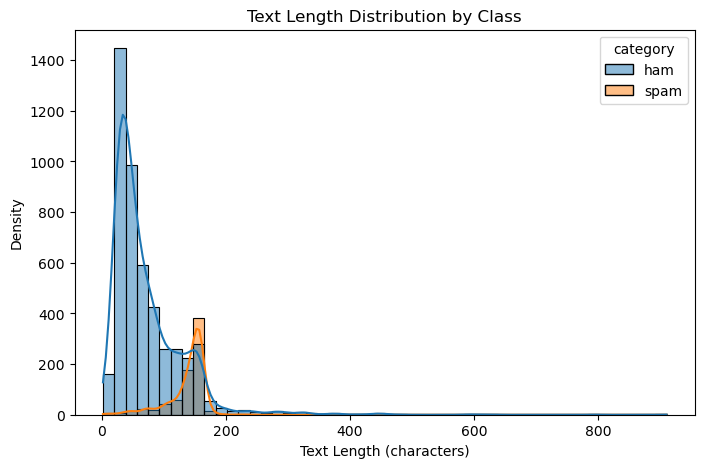

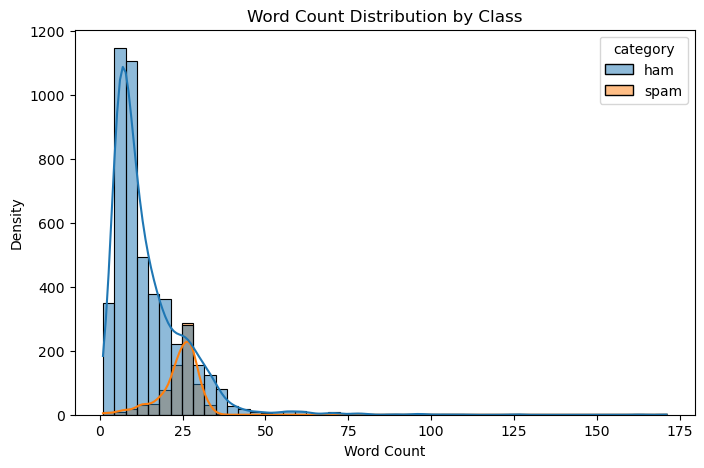

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='text_length', hue=label_col, kde=True, bins=50)
plt.title("Text Length Distribution by Class")
plt.xlabel("Text Length (characters)")
plt.ylabel("Density")
plt.show()
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='word_count', hue=label_col, kde=True, bins=50)
plt.title("Word Count Distribution by Class")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

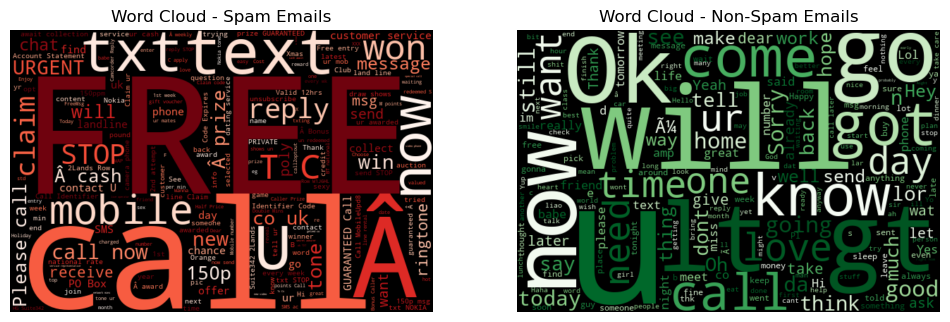

In [9]:
spam_texts = " ".join(df[df[label_col] == 'spam'][text_col].astype(str))
ham_texts = " ".join(df[df[label_col] != 'spam'][text_col].astype(str))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wc_spam = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_texts)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Spam Emails")
plt.subplot(1,2,2)
wc_ham = WordCloud(width=600, height=400, background_color='black', colormap='Greens').generate(ham_texts)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Non-Spam Emails")
plt.show()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
/tmp/ipykernel_1459/2003076809.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=spam_df, ax=axes[0], palette="Reds_r")
/tmp/ipykernel_1459/2003076809.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=ham_df, ax=axes[1], palette="Greens_r")


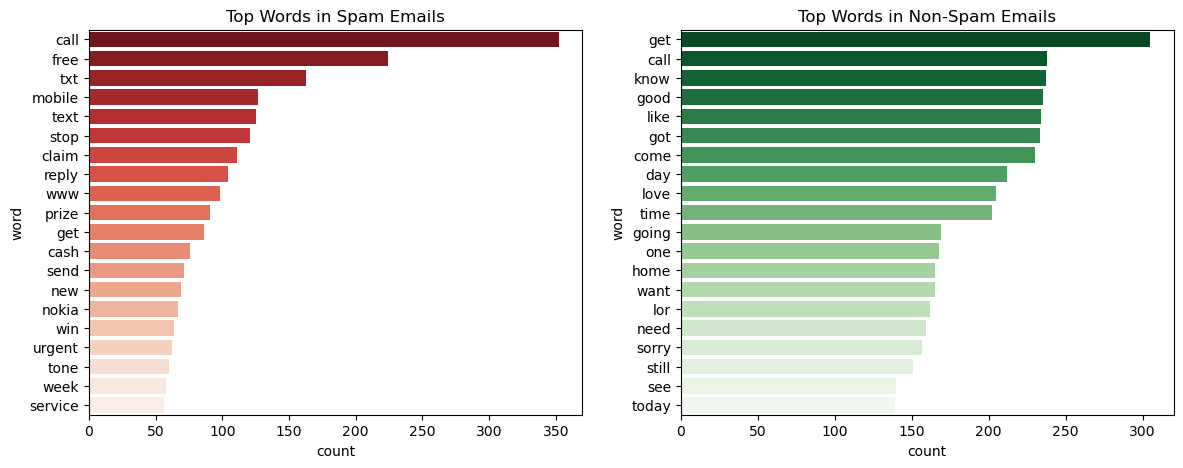

In [10]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def get_top_n_words(texts, n=20):
    words = " ".join(texts).lower()
    words = re.findall(r'\b[a-z]{3,}\b', words)
    filtered = [w for w in words if w not in stop_words]
    return Counter(filtered).most_common(n)
spam_words = get_top_n_words(df[df[label_col] == 'spam'][text_col])
ham_words = get_top_n_words(df[df[label_col] != 'spam'][text_col])
spam_df = pd.DataFrame(spam_words, columns=['word', 'count'])
ham_df = pd.DataFrame(ham_words, columns=['word', 'count'])
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x='count', y='word', data=spam_df, ax=axes[0], palette="Reds_r")
axes[0].set_title("Top Words in Spam Emails")
sns.barplot(x='count', y='word', data=ham_df, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top Words in Non-Spam Emails")
plt.show()

/tmp/ipykernel_1459/2590481202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label_col, y='text_length', data=df, palette='Set2')


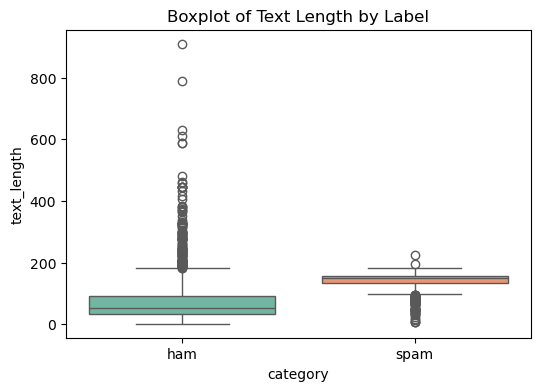

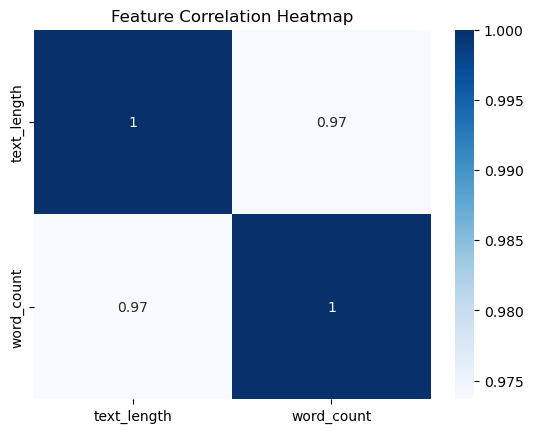

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=label_col, y='text_length', data=df, palette='Set2')
plt.title("Boxplot of Text Length by Label")
plt.show()
corr = df[['text_length', 'word_count']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
import plotly.express as px
fig = px.histogram(df, x='word_count', color=label_col, nbins=40,
                   title='Interactive Word Count Distribution by Label', marginal='box')
fig.show()

In [13]:
print("📘 EDA Summary:")
print("""
1️⃣ Dataset is balanced/unbalanced depending on spam ratio.
2️⃣ Spam messages tend to be shorter/longer depending on your plot trends.
3️⃣ Frequent words in spam emails often include promotional or call-to-action terms.
4️⃣ Word clouds visually show content differences.
5️⃣ These observations will guide preprocessing (text cleaning, stopword removal, and feature selection).
""")

📘 EDA Summary:

1️⃣ Dataset is balanced/unbalanced depending on spam ratio.
2️⃣ Spam messages tend to be shorter/longer depending on your plot trends.
3️⃣ Frequent words in spam emails often include promotional or call-to-action terms.
4️⃣ Word clouds visually show content differences.
5️⃣ These observations will guide preprocessing (text cleaning, stopword removal, and feature selection).

